# PS2- Analyzing Impact of the Progresa Assistance Program

In [1]:
# import libraries used
import numpy as np
import pandas as pd
from scipy import stats # ANOVA
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # linear modeling

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above? 

In [3]:
#Read in .csv file with data on Progresa campaign
data = pd.read_csv("PS2/progresa_sample.csv")

#Drop columns for columns as specified
dataSummary = data.drop(columns=['year', 'folnum', 'village'])

#Print table grouping by Progresa and Poor for group size, standard deviation, and mean
print("Mean, Std. Deviation Table for attribute groupings for 'Treatment' and 'Poor' variables")
print("")
dataSummary.groupby(['progresa', 'poor']).agg([np.size, np.mean, np.std]).transpose()

Mean, Std. Deviation Table for attribute groupings for 'Treatment' and 'Poor' variables



progresa                      0                      basal              
poor                   no pobre         pobre     no pobre         pobre
sex           size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     0.496203      0.505052     0.507589      0.519317
              std      0.500038      0.499984     0.499978      0.499633
indig         size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     0.111817      0.332207     0.146169      0.325986
              std      0.315175      0.471014     0.353301      0.468748
dist_sec      size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     2.182458      2.507662     2.070875      2.453122
              std      2.201688      2.490255     1.721580      2.141212
sc            size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     0.768712      0.811641     0.801435      0.833891
              std      0.421707      0.391007     0.398951      0.372184
grc           size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     4.806161      3.810395     4.855501      3.810007
              std      2.592468      2.460059     2.614306      2.440515
fam_n         size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     6.888233      7.302469     6.756886      7.281327
              std      2.396068      2.362807     2.387524      2.322986
min_dist      size  4742.000000  24948.000000  7116.000000  40444.000000
              mean    90.734247    103.237854    91.594810    107.152915
              std     41.986958     43.663254    39.951263     40.778027
dist_cap      size  4742.000000  24948.000000  7116.000000  40444.000000
              mean   120.619666    153.769730   126.404535    150.829074
              std     59.099801     82.633912    66.103910     73.907923
hohedu        size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     3.396457      2.590348     3.569140      2.663139
              std      3.167232      2.459707     3.264946      2.549971
hohwag        size  4742.000000  24948.000000  7116.000000  40444.000000
              mean   764.569992    573.163558   759.481664    544.339544
              std   1060.654593    705.626658  1172.006202    703.503191
welfare_index size  4742.000000  24948.000000  7116.000000  40444.000000
              mean   879.263159    659.579100   871.340460    655.428377
              std    126.616147    115.943100   119.038178    112.990595
hohsex        size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     0.923239      0.922947     0.937324      0.924656
              std      0.266240      0.266680     0.242396      0.263949
hohage        size  4742.000000  24948.000000  7116.000000  40444.000000
              mean    47.362716     44.276918    47.524171     43.648828
              std     11.771395     11.842345    11.348481     11.366469
age           size  4742.000000  24948.000000  7116.000000  40444.000000
              mean    12.163855     11.242023    12.120854     11.216991
              std      3.220757      3.139114     3.176558      3.144933
grc97         size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     4.622522      3.543050     4.650927      3.531599
              std      2.687645      2.524349     2.696160      2.506094
sc97          size  4742.000000  24948.000000  7116.000000  40444.000000
              mean     0.762587      0.815186     0.795264      0.822697
              std      0.425544      0.388155     0.403538      0.381930

### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

In [5]:
#Filtering data to only families classified as poor, and measured in 1997
dataClean = data[(data.poor == 'pobre') & (data.year == 97)]

#Removing columns that contain text or ID information; axis = 1 means across rows
dataClean = dataClean.drop(['year', 'folnum', 'village', 'poor'], axis=1)

#Drop data where values are missing
dataClean = dataClean.dropna()

#Seperate out treatment and control
dataCleanSummary = dataClean.groupby('progresa').mean().transpose()

#Add a column for difference in results between treatment, control
dataCleanSummary['diff'] = dataCleanSummary.basal - dataCleanSummary['0'] 


#Break datasets into two groups- treated and control
treated = dataClean[dataClean.progresa == 'basal']
control = dataClean[dataClean.progresa == '0']

#Drop the progresa column- it contains text, and is not relevant beyond classifying our data
treated = treated.drop(['progresa'], axis=1)
control = control.drop(['progresa'], axis=1)

#Compute p-values and add them to the Summary table
dataCleanSummary['p'] = np.round_(stats.ttest_ind(treated, control, equal_var=False).pvalue, decimals = 5)

dataCleanSummary.columns = ['Avg (Control)', 'Avg (Treatment)', 'Diff (Treat - Control)', 'p-value']
dataCleanSummary

,Avg (Control),Avg (Treatment),Diff (Treat - Control),p-value
sex,0.506556,0.520268,0.013713,0.01959
indig,0.325306,0.316744,-0.008562,0.11900
dist_sec,2.400687,2.399648,-0.001039,0.96807
sc,0.815066,0.822697,0.007631,0.09247
grc,3.733653,3.709214,-0.024439,0.39551
fam_n,7.302939,7.281032,-0.021907,0.42605
min_dist,103.098348,107.395231,4.296884,0.00000
dist_cap,154.492095,151.801472,-2.690622,0.00436
hohedu,2.660982,2.726729,0.065747,0.02496
hohwag,580.694452,550.207086,-30.487366,0.00029


### 1.3 Interpretation

###### A: Are there statistically significant differences between treatment and control villages as baseline? 
Yes- the following factors are statistically significant (p < 0.05) differences between treatment and control villages-
* sex
* min_dist
* dist_cap
* hohedu
* hohwag
* hohage

###### B: Why does it matter if there are differences at baseline?
We're administering tests to see whether progresa has an affect on school enrollment rates. As a reminder- this data is BEFORE the treatment is administered. We will be comparing the results to the villages and families before the trial begun, but also against villages and families that didn't receive this treatment.

It is important in such cases that the two groups- the treatment and control, be as similar as possible before the treatment is actually administered.

If we have differences before the test is administered between the control and treatment group, it may have been a good idea to re-randomize which villages got progresa so that the differences between them are minimized. If not done so, these differences can impact the results of our study by having us compare treatments against a control group that is inherently different from our treatment group- we would need to adjust for these differences in the future (if that's even possible), or be unable to accurately assess the actual impact progresa has had against the control group.

###### C: What does this imply about how to measure the impact of the treatment?
Measuring the effect of the treatment against the control group is going to be hard if we're only looking at enrollment rates (sc), since the two groups are inherently different. We need to account for these differences some how if by factoring in for the categories in A. if we want to compare them.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship.

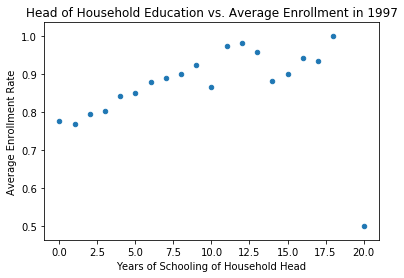

In [11]:
#Filter data for only 1997
data1997HeadEdu = data[data.year == 97]

#To optimize, only select relevant columns
data1997HeadEdu = data1997HeadEdu[['hohedu', 'sc']]

#Group by the head of family's years of education and calculate mean on how many children enrolled
data1997HeadEdu = data1997HeadEdu.groupby('hohedu').mean()

#Convert the object back into a dataframe
data1997HeadEdu = data1997HeadEdu.reset_index('hohedu')

#Plot on Scatterplot; add axis
plot = data1997HeadEdu.plot.scatter(x='hohedu', y='sc')
plot.set_title("Head of Household Education vs. Average Enrollment in 1997")
plot.set_xlabel("Years of Schooling of Household Head")
plot.set_ylabel("Average Enrollment Rate")
plot

The scatterplot suggests the relationship between a families children's enrollment and a families head's education is positively correlated- the greater the number of years of schooling for a household heads, the greater the average enrollment rate is. 

The relationship is almost linear from 0 to 12 years of education (outlier at 10), but is less clear after 12 with spikes and increases. 20 may be an outlier too.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment.  Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. 

AxesSubplot(0.125,0.125;0.775x0.755)


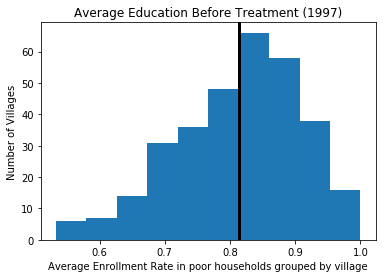

In [14]:
#Filter data to poor households, in 1997, in villages that were treated
data1997 = data[data.year == 97]
data1997Poor = data1997[data1997.poor == 'pobre']
data1997PoorTreated = data1997Poor[data1997Poor.progresa == 'basal']

#Group households by village, find mean
data1997PoorTreatedMean = data1997PoorTreated.groupby('village').mean()
data1997PoorTreatedMean.reset_index()

#Plot histogram
plot = data1997PoorTreatedMean.sc.plot.hist()
plot.axvline(data1997PoorTreatedMean.sc.mean(), color = 'black', linewidth = 3)
plot.set_title("Average Education Before Treatment (1997)")
plot.set_xlabel("Average Enrollment Rate in poor households grouped by village")
plot.set_ylabel("Number of Villages")
print(plot)

AxesSubplot(0.125,0.125;0.775x0.755)


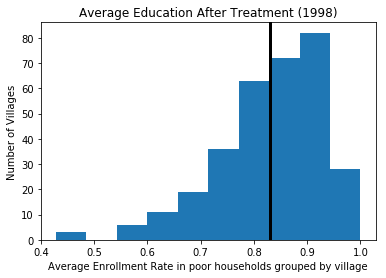

In [12]:
#Filter data to poor households, in 1998, in villages that were treated
data1998 = data[data.year == 98]
data1998Poor = data1998[data1998.poor == 'pobre']
data1998PoorTreated = data1998Poor[data1998Poor.progresa == 'basal']

#Group households by village, find mean
data1998PoorTreatedMean = data1998PoorTreated.groupby('village').mean()
data1998PoorTreatedMean.reset_index()

#Plot histogram
plot = data1998PoorTreatedMean.sc.plot.hist()
plot.axvline(data1998PoorTreatedMean.sc.mean(), color = 'black', linewidth = 3)
plot.set_title("Average Education After Treatment (1998)")
plot.set_xlabel("Average Enrollment Rate in poor households grouped by village")
plot.set_ylabel("Number of Villages")
print(plot)

In [15]:
#Calculate p-value to test if results are statistically significant
pValue = stats.ttest_ind(data1997PoorTreatedMean.sc, data1998PoorTreatedMean.sc, equal_var=False).pvalue
print('P-value for the t-test: ', pValue)

P-value for the t-test:  0.044249343422588405


The average enrollment line does increase after the treatment, suggesting there may be some correlation with the program and change increase in average enrollment rates. Our null hypothesis is that the program does not affect enrollment rates; however- since the p-value is lower than 0.05, we reject this hypothesis.

The histogram also shifts to the right (left skewed), which indicates visually that enrollment rates have shifted towards increasing after the program was administered.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [16]:
#Filter data to poor households, in 1998, in villages that were treated
#Already calculated above
print("Average enrollment in treated villages: ", data1998PoorTreated.sc.mean())

#Filter data to poor households, in 1998, in villages that were NOT treated
data1998PoorNOTTreated = data1998Poor[data1998Poor.progresa == '0']
print("Average enrollment in control villages: ", data1998PoorNOTTreated.sc.mean())

#Difference in treatment and control
print("Difference in average enrollment b/w treatment and control: ", data1998PoorTreated.sc.mean() - data1998PoorNOTTreated.sc.mean())

#Need to convert dataframes to arrays without NA values
a = data1998PoorTreated.sc.dropna()
b = data1998PoorNOTTreated.sc.dropna()

#t-test to see if difference statistically significant
print(stats.ttest_ind(a, b, equal_var = False))

#extract pvalue; HOW TO INTERPRET?!?

Average enrollment in treated villages:  0.8464791213954308
Average enrollment in control villages:  0.807636956730308
Difference in average enrollment b/w treatment and control:  0.0388421646651228
Ttest_indResult(statistic=8.181477157107308, pvalue=2.9655072988948406e-16)


Our Null Hypothesis in this test would be that there is NOT a significant difference between villages that have been treated and those that have not. However, since the p-value is lower than 0.05, we reject this hypothesis. There is a statistically significant difference in average enrollment rates between villages that were and were not treated.

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.

In [17]:
lm = smf.ols(formula = 'sc ~ progresa', data=data1998Poor.dropna()).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           5.66e-16
Time:                        12:25:43   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.00

###### Based on this model, how much did Progresa increase the likelihood of a child enrolling?
Our regression model correlates the application of the progresa program with a 3.83% increase in attendance in the treated vilages.

###### How does your regression estimate compare to your t-test estimate from part 2.1?
This result is supported by our results in Part 2.1, which gave a similar difference of 3.88%. Our result from the regression is marginally lower than our answer from Part 2.1.

###### Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
Our Null Hypothesis in this test would be that there is NOT a significant difference between villages that have been treated and those that have not. Our p-value is low enough that we reject this hypothesis.

###### What is the counterfactual assumption underlying this regression?
We are assuming the 1997 enrollment rates before the treatment (progresa) was administered is the same.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

In [18]:
# Your code here
lm = smf.ols(formula = 'sc ~ progresa + hohedu + age + hohwag + dist_sec + sex', data=data1998Poor.dropna()).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     1528.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:26:11   Log-Likelihood:                -7274.5
No. Observations:               26155   AIC:                         1.456e+04
Df Residuals:                   26148   BIC:                         1.462e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5371      0.01

###### How do the controls affect the point estimate of treatment effect?
Including controls has dropped the change in enrollment thought to be correlated with the program in comparison to our earlier findings, but our p-value is still low enough that we can to reject the null hypothesis that the program has had no affect on attendance- it is stastically significant.

###### How do the controls affect the standard error on the treatment effect? 
Our standard error has dropped from 0.005 to 0.004. 

###### How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
The effect because of Progresa has decreased, with the other considered factors having a statistically significant impact on average enrollment rates. However, our standard error for progresa has decreased, improving our model accuraccy; making the model following multiple regressions a better fit for our data.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.
(i.e. Difference-in-Differences estimate = [Y_T(98) - Y_C(98)] - [Y_T(97) - Y_C(97)])

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [19]:
def meanSC(data, year, treatment):
    return data[(data.year == year) & (data.progresa == treatment) & (data.poor == 'pobre')].dropna().sc.mean()

print("a) Enrollment rates in poor households in treated villages: ")
print("1997 enrollment rates: ", round(meanSC(data, 97, 'basal'), 4))
print("1998 enrollment rates: ", round(meanSC(data, 98, 'basal'), 4))
print("Difference in enrollment rates: ", round(meanSC(data, 98, 'basal') - meanSC(data, 97, 'basal'), 4))
print("")
print("b) Enrollment rates in poor households in control villages: ")
print("1997 Control villages enrollment rates: ", round(meanSC(data, 97, '0'), 4))
print("1998 Control villages enrollment rates: ", round(meanSC(data, 98, '0'), 4))
print("Difference in enrollment rates: ", round(meanSC(data, 98, '0') - meanSC(data, 97, '0'), 4))
print("")
print("c) Difference in enrollment differences between control and treated: ", round((meanSC(data, 98, 'basal') - meanSC(data, 98, '0')) - (meanSC(data, 97, 'basal') - meanSC(data, 97, '0')), 4))

a) Enrollment rates in poor households in treated villages: 
1997 enrollment rates:  0.8227
1998 enrollment rates:  0.8493
Difference in enrollment rates:  0.0266

b) Enrollment rates in poor households in control villages: 
1997 Control villages enrollment rates:  0.8151
1998 Control villages enrollment rates:  0.8109
Difference in enrollment rates:  -0.0041

c) Difference in enrollment differences between control and treated:  0.0307


* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* The estimate of the impact of the progresa treatment on the average enrollment rate is 3.07% which is lower from the previously measured affect. 
* 
* What is the counterfactual assumption underlying this estimate? 
* If the subsidy/ progresa treatment was NOT applied, there would NOT be any difference between the treated and control villages's average enrollment rates as measured in 1997 and 1998.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

In [20]:
data9798 = data[(data.year == 97) | (data.year == 98)].dropna()
lm = smf.ols(formula = 'sc ~ (progresa * poor) + hohedu + age + hohwag + dist_sec + sex', data=data9798).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     3112.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:27:26   Log-Likelihood:                -20282.
No. Observations:               67122   AIC:                         4.058e+04
Df Residuals:                   67113   BIC:                         4.066e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

###### What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
Progresa has a 2.83% increase in enrollment rates when administered to villages. This is statistically significant and we can reject the null hypothesis given the p-value of 0.001. Our standard error is higher than previous models though, which is concerning and would suggest this model may not be a good fit for our data. What's more interesting is we fail to reject our null hypothesis, that a given attribute does not have a statistically significant affect on response variable, for the attributes of poor, the combined effect of poor and progresa, and the head of family age given their large p-values. 

###### How do these estimates of the treatment effect compare to the estimates based on the simple difference?
Our measured impact of progresa is much lower than our previously calculated difference when considering just progresa by itself. 

###### How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
Although the effect of progresa is lower, we may reject the null hypothesis on the basis of the p-value; progresa has still had a statistically significant impact on the enrollment rates. The lowering of progresa's value is marked with changes elsewhere such as (all values discussed are statistically significant)
* more educated the head of a family is, the more likely it is that the children of said family will remain enrolled in school- which makes sense- if the head of the family has been educated, they likely see some benefit or skill that school may provide, or has a higher income because of said developed skills, which makes it more likely to these families children to be enrolled in school. 
* age- the younger a child is, the more likely they are to be administered in school. If a child is not already enrolled in school from a young age, it is intuitive to believe that the family is less likely to enroll them in school as they get older.

###### What is the counterfactual assumption underlying this regression? 
The data would not change between families and villages had progresa NOT been administered.

### 2.6 Summary

Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

Based on all our data and findings, it is likely Progresa has had a causal impact on enrollment rates. In each regression test conducted, we rejected our null hypothesis (Progresa has not had an impact on enrollment rates), even after considering other factors. That said, Progresa's impact, while statistically significant, has caused a very small increase in enrollment rates.